# Aggregate Data with pandas

we'll work with the World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

 - How can aggregating the data give us more insight into happiness scores?
 - How did world happiness change from 2015 to 2017?
 - Which factors contribute the most to the happiness score?

In [1]:
import pandas as pd

happiness2015 = pd.read_csv("World_Happiness_2015.csv")
first_5 = happiness2015.head()
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


#### Identify each unique group in the data set.

- For each group:
  - Select only the rows corresponding to that group.
  - Calculate the average for those rows.

In [3]:
mean_happiness = {}
regions = happiness2015['Region'].unique()
for r in regions:
    # Split the dataframe into groups
    region_group = happiness2015[happiness2015['Region'] == r]
    # Apply a function to each group
    region_mean = region_group['Happiness Score'].mean()
    # Combine the results into one data structure
    mean_happiness[r] = region_mean

In [5]:
# Use the df.groupby() method to group happiness2015 by the Region column
grouped = happiness2015.groupby('Region')

# Use the GroupBy.get_group() method to select the data 
# for the Australia and New Zealand group only.
aus_nz = grouped.get_group('Australia and New Zealand')

In [8]:
# use the result from the dictionary returned by grouped.groups
# 'North America': Int64Index([4, 14], dtype='int64'

# Prove that the values for the 'North America' group in the dictionary 
# returned by grouped.groups above correspond to countries in North America 
# in the happiness2015 dataframe.

# Use the snippet above to identify the indexes of the countries 
# in happiness2015 that belong to the North America group.

grouped = happiness2015.groupby('Region')

# Use the indexes to assign just the countries in North America 
# in happiness2015 to north_america.
north_america = happiness2015.iloc[[4,14]]


# Use the GroupBy.get_group() method to select the data for the 
# North America group only. Assign the result to na_group.


na_group = grouped.get_group('North America')

equal = north_america == na_group

In [9]:
# Apply the GroupBy.mean() method to grouped. 
# Assign the result to means.
means = grouped.mean()

In [10]:
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

In [12]:
#  GroupBy.agg() method
import numpy as np
def dif(group):
    return (group.max() - group.mean())
happy_mean_max = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)

In [13]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
print(happiness_means)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


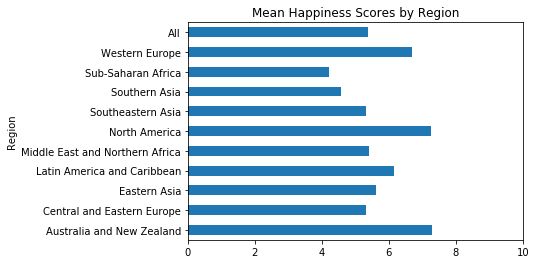

In [14]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False)
world_mean_happiness = happiness2015['Happiness Score'].mean()

In [15]:
grouped = happiness2015.groupby('Region')[['Happiness Score','Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc=[np.min, np.max, np.mean], margins=True)